# PROYECTO DE MACHINE LEARNING

**Autor:** Hector Elias Huarancca Nuñez

## Descripción

Con la data usada procede de una institucion financiera mediante el me permitira elaborar una clasificación de clientes para identificar la deseción de clientes. 

* **ScoreCrediticio:** Asignado por la Institucion Financiera.
* **Pais:** Pais de residencia del cliente.
* **Genero:** Female/Male.
* **Edad:** Continua.
* **Tenure:** Continua.
* **Balance:** Situacion financiera del cliente en la Institucion Financiera.
* **NumDeProducts:** Numero de productos contratados por cliente (Cuenta Ahorros, Cuenta Millonaria, etc).
* **TieneTarjetaCredito:** Si/No.
* **EsMiembroActivo:** Si/No (realiza consumos, contrata servicios, etc)
* **SalarioEstimado:** Salario mensual del cliente.

## Librerias

In [1]:
import utils, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Procesamiento de data

In [2]:
df = pd.read_csv('Data/clientes_data.csv')
df.shape

(10000, 14)

In [3]:
df.head()

,NumeroFila,DNI,Apellido,ScoreCrediticio,Pais,Genero,edad,Tenure,Balance,NumDeProducts,TieneTarjetaCredito,EsMiembroActivo,SalarioEstimado,Abandono
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Si,Si,101348.88,Si
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Si,112542.58,No
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Si,No,113931.57,Si
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Si,Si,79084.10,No


In [4]:
# Eliminamos las 3 primeras columnas que corresponden a NumeroFila, DNI y Apellido
if 'NumeroFila'in df.columns:
    df.drop(df.columns[0:3], axis = 1, inplace = True)
df.head()

,ScoreCrediticio,Pais,Genero,edad,Tenure,Balance,NumDeProducts,TieneTarjetaCredito,EsMiembroActivo,SalarioEstimado,Abandono
0,619,France,Female,42,2,0.00,1,Si,Si,101348.88,Si
1,608,Spain,Female,41,1,83807.86,1,No,Si,112542.58,No
2,502,France,Female,42,8,159660.80,3,Si,No,113931.57,Si
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,Si,Si,79084.10,No


In [5]:
#Visualizamos el tipo de datos
df.dtypes

ScoreCrediticio          int64
Pais                    object
Genero                  object
edad                     int64
Tenure                   int64
Balance                float64
NumDeProducts            int64
TieneTarjetaCredito     object
EsMiembroActivo         object
SalarioEstimado        float64
Abandono                object
dtype: object

In [6]:
# Procedemos a convertir las columnas a tipo "category" dejando de lado la columna 'Abandono'
for n,col in df.items():
    if not pd.api.types.is_numeric_dtype(col) and n != 'Abandono':
        # Transforma la variable a tipo category
        df[n] = col.astype('category')      

df.dtypes

ScoreCrediticio           int64
Pais                   category
Genero                 category
edad                      int64
Tenure                    int64
Balance                 float64
NumDeProducts             int64
TieneTarjetaCredito    category
EsMiembroActivo        category
SalarioEstimado         float64
Abandono                 object
dtype: object

In [7]:
# Como el dataset no tiene data faltante procedemos a transformar las columnas a numerica.
df_final = df.copy()

# Convertir cada columna categórica a numérica
for n,col in df_final.items():
    if pd.api.types.is_categorical_dtype(col):
        df_final[n] = col.cat.codes+1
        
df_final.head(10)

,ScoreCrediticio,Pais,Genero,edad,Tenure,Balance,NumDeProducts,TieneTarjetaCredito,EsMiembroActivo,SalarioEstimado,Abandono
0,619,1,1,42,2,0.00,1,2,2,101348.88,Si
1,608,3,1,41,1,83807.86,1,1,2,112542.58,No
2,502,1,1,42,8,159660.80,3,2,1,113931.57,Si
3,699,1,1,39,1,0.00,2,1,1,93826.63,No
4,850,3,1,43,2,125510.82,1,2,2,79084.10,No
5,645,3,2,44,8,113755.78,2,2,1,149756.71,Si
6,822,1,2,50,7,0.00,2,2,2,10062.80,No
7,376,2,1,29,4,115046.74,4,2,1,119346.88,Si
8,501,1,2,44,4,142051.07,2,1,2,74940.50,No
9,684,1,2,27,2,134603.88,1,2,2,71725.73,No


In [8]:
df_final.shape

(10000, 11)

In [9]:
#Importamos la train_test_split para realizar el split del dataset
from sklearn.model_selection import train_test_split
x = df_final.drop('Abandono', axis=1)
y = df_final['Abandono']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Dimension Data train : {x_train.shape}')
print(f'Dimension Data test : {x_val.shape}')

Dimension Data train : (8000, 10)
Dimension Data test : (2000, 10)


# Entrenamiento de Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=10, n_jobs=-1)
m.fit(x_train, y_train)

/home/hector/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Definición de Score 

In [11]:
# Funcion score que me permite visualizar los resultados del entrenamiento.
def score():
    print(f'Scores:')
    print(f'Train      = {m.score(x_train, y_train):.4}')
    print(f'Validation = {m.score(x_val, y_val):.4}')
    
score() 

Scores:
Train      = 0.9836
Validation = 0.8555


In [12]:
# El parámetro "estimators_" del modelo, contiene los árboles entrenados.
# Vamos a obtener las prediciones de cada árbol
preds = np.stack([t.predict(x_val) for t in m.estimators_])
print(preds.shape)
preds

(10, 2000)


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

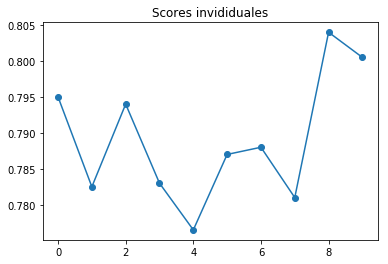

In [13]:
# Ahora procedemos a visualiza el score de cada arbol
from sklearn.metrics import accuracy_score

accs = [accuracy_score(y_val=='Si', p) for p in preds]
plt.plot(accs, '-o')
plt.title('Scores invididuales');

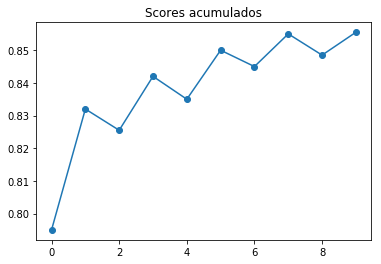

In [14]:
# Ahora veamos el score acumulado
acum_accs = [accuracy_score(y_val=='Si', np.mean(preds[:i+1,:], axis=0) > 0.5) for i in range(len(preds))]
plt.plot(acum_accs, '-o')
plt.title('Scores acumulados');

In [15]:
# Usemos los árboles para obtener una predicción con una estimación de confianza.
sample = x_val.sample(1)

pred = np.stack([t.predict(sample) for t in m.estimators_])

pred.mean() > 0.5, pred.std()

(False, 0.30000000000000004)

In [16]:
pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]])

## Out-of-bag (OOB) score

Ahora procedemos a hallar el 

In [17]:
m = RandomForestClassifier(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [18]:
m.oob_score_

0.85225

In [19]:
# Vamos a modificar la función score, para incluir el oob score.
def score():
    print(f'Scores:')
    print(f'Train      = {m.score(x_train, y_train):.4}')
    print(f'Validation = {m.score(x_val, y_val):.4}')
    if hasattr(m, 'oob_score_'): print(f'OOB        = {m.oob_score_:.4}')
    
score()   

Scores:
Train      = 0.9991
Validation = 0.863
OOB        = 0.8522


# Interpretacion del modelo

## Features importances

###  Mean decrease impurity

In [20]:
m.feature_importances_

array([0.1406549 , 0.03549927, 0.01936538, 0.24070449, 0.0831941 ,
       0.13956381, 0.12659247, 0.01957321, 0.04422726, 0.15062512])

In [21]:
imp = pd.DataFrame({'columna':x_train.columns, 'importancia':m.feature_importances_}).sort_values('importancia', ascending=False)
imp.style.bar()

,columna,importancia
3,edad,0.240704
9,SalarioEstimado,0.150625
0,ScoreCrediticio,0.140655
5,Balance,0.139564
6,NumDeProducts,0.126592
4,Tenure,0.0831941
8,EsMiembroActivo,0.0442273
1,Pais,0.0354993
7,TieneTarjetaCredito,0.0195732
2,Genero,0.0193654


### Importancia de Permutacion

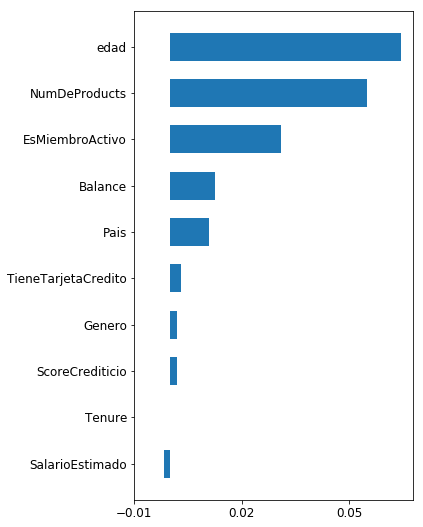

CPU times: user 547 ms, sys: 26.2 ms, total: 573 ms
Wall time: 1.33 s


In [22]:
%%time
from rfpimp import importances, plot_importances

imp = importances(m, x_val, y_val)
plot_importances(imp, figsize=(5,9));

### Drop Column Importance

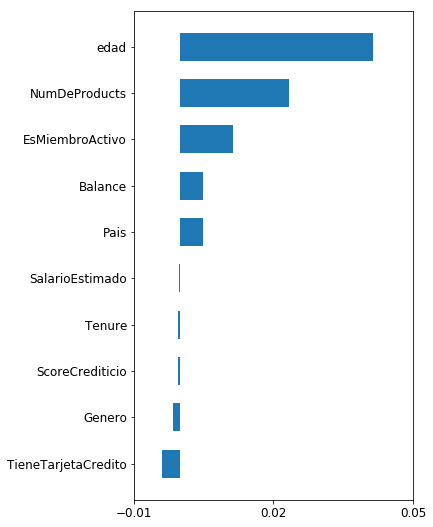

CPU times: user 6.56 s, sys: 141 ms, total: 6.7 s
Wall time: 3.24 s


In [23]:
%%time
from rfpimp import dropcol_importances

imp = dropcol_importances(m, x_train, y_train)
plot_importances(imp, figsize=(5,9));

## Haciendo Predicciones

In [24]:
# Ahora procedemos a predecir el comportamiento de un nuevo cliente con determinados atributos
# ScoreCrediticio, Pais, Genero, edad, Tenure, Balance, NumDeProducts,
# TieneTarjetaCredito, EsMiembroActivo, SalarioEstimado

Cliente_new = np.array([[600,1,2,40,3,60000,2,1,1,50000]])
Cliente_new.shape

(1, 10)

In [25]:
# Ahora procedemos a hacer la prediccion del futuro de un cliente X
prediccion = m.predict(Cliente_new)
print("El cliente abandona: {}".format(prediccion))

El cliente abandona: ['No']


## Evaluación de modelo

Procedemos a evaluar el accuracy del modelo

In [26]:
y_pred = m.predict(x_val)
print("Predicción de las validaciones:\n {}".format(y_pred))

Predicción de las validaciones:
 ['No' 'No' 'No' ... 'Si' 'No' 'No']


In [27]:
#Score del Conjunto de Validacion
np.mean(y_pred == y_val)

0.863

In [28]:
# Score del Conjunto de Validacion
m.score(x_val, y_val)

0.863

In [29]:
m.oob_score_

0.85225